
# Week 1 STA 2543
---

For the purposes of lectures I will be using google colab due to its preconfigured environment. However, you should familiarize yourself with the linux environment, setting it up on your machine be it Windows or Mac, learning how to use the bash shell command line interface, these skills are highly relevant during both the workplace, and the interview process as illustrated by the lecture slides. 

## Preamble

These are the python libraries I will be using for the course. 


In [ ]:
import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 

### Basic Linux CLI

In [ ]:
ls # list files in current directory 

sample_data/


In [ ]:
pwd # get current location respective of global. 

'/content'

In [ ]:
!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/SH_CLAY_11_4051.csv # get file from my repo

--2022-09-14 20:20:41--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/SH_CLAY_11_4051.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228929 (224K) [text/plain]
Saving to: ‘SH_CLAY_11_4051.csv’

SH_CLAY_11_4051.csv 100%[===================>] 223.56K  --.-KB/s    in 0.02s   

2022-09-14 20:20:41 (13.3 MB/s) - ‘SH_CLAY_11_4051.csv’ saved [228929/228929]



In [ ]:
ls

sample_data/  SH_CLAY_11_4051.csv


In [ ]:
!wget https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/results.csv

--2022-09-14 03:36:38--  https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460008 (449K) [text/plain]
Saving to: ‘results.csv’

results.csv         100%[===================>] 449.23K  --.-KB/s    in 0.03s   

2022-09-14 03:36:38 (15.5 MB/s) - ‘results.csv’ saved [460008/460008]



## Advanced Descriptive Statistics

Let's begin with an applied dive into descriptive statistics. 

- Sample mean
- Sample variance
- Sample median 
- Sample quantiles, min/max, and others..


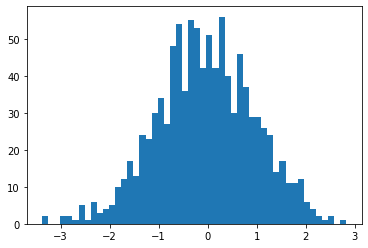

In [ ]:
# generate normal dataset. 
x = np.random.normal(0.0, 1.0, size=(1000))
plt.hist(x, bins= 50);

In [ ]:
# write functions that calculate the above statistics, although 
# some of these functions already exist in numpy I will be verbose about this. 

def sample_mean(x: np.array) -> float: 
  """
  calculate the sample mean of a np array
  """
  return(np.mean(x))

def sample_variance(x: np.array) -> float: 
  """
    calculate the second sample moment. 
  """

  n = x.shape[0]
  m2 = np.sum( (x - sample_mean(x)) **2 ) / n 
  return (m2)

def sample_median(x: np.array) -> float:
  """
    50% quantile really. 
  """
  return (np.median(x))

def sample_min(x: np.array) -> float:
  """
    smallest number in an array
  """
  return np.min(x)

def sample_max(x: np.array)-> float: 
  """
    largest number in an array
  """

  return np.max(x)

def display_statistics(x: np.array) -> None: 
  """
    Display's an f'string formatted to min, median, mean and max for
    basic statistics. 
  """
  x_min = sample_min(x)
  x_med = sample_median(x)
  x_mean = sample_mean(x)
  x_max = sample_max(x)

  display_string = f"Min: {x_min}, Median: {x_med}, Mean: {x_mean}, Max: {x_max} "
  print(display_string)

In [ ]:
display_statistics(x)

Min: -3.3786727701583446, Median: -0.046756493870083515, Mean: -0.04760278335719984, Max: 2.830273490747334 


## Kurtosis and Skewness
These measures are concerned with the deviation from normality. 

- Departure from Symmetry
- How peaked the data is... or... according to Peter Westfall, how fat the tails are. 

In [ ]:
def sample_skewness(x: np.array) -> float: 
    """
        Takes in a given x, 
        calculate sample mean, 
        sample std, and then calculate sample skewness.
    """
    
    # calculate sample mean. 
    n = x.shape[0]
    mu = sample_mean(x) 
    var = sample_variance(x)
    var = var * (n-1) / n
    
    M3 = np.sum( ((x - mu) ** 3 / n) )
    kappa = M3 / (var ** (1.5))
    kappa = (np.sqrt(n * (n - 1)) / (n - 2)) * kappa
    return kappa
    
def sample_eta(x: np.array) -> float: 
  """
  sample kurtosis accoridng to Cramer 1979
  """
  n = x.shape[0]
  xbar = sample_mean(x)
  m4 = np.sum( (x - xbar) **4 ) /n
  m2 = sample_variance(x)
  eta = (n-1) / ((n-2) * (n-3)) * (   (n+1) * ( m4 / (m2**2))  + 6)   
  return eta


In [ ]:
sample_eta(x)

2.992040634318911

## Generate Scenarios of Gaussian Data
Acquire a distribution of statistics. 

In [ ]:

def generate_scenarios(scenarios = 1000, n_size = 1000): 
    """
        A function for understanding what a p value is. 
    """

    p_values = np.zeros(scenarios, dtype="float64")
    skewnesses = np.zeros(scenarios, dtype="float64")
    kurtosis = np.zeros(scenarios, dtype="float64")
    
    # for each scenario...
    for i in range(scenarios):
            
        # generate data. 
        x_i = np.random.normal(loc = 0.0, scale = 1.0, size = n_size) 
        # x_i = np.exp(x_i) - 1
        
        mu_i = sample_mean(x_i)
        sigma_i = np.sqrt(sample_variance(x_i))            
        
        # we are going to use a t-statistic here. 
        t_statistic = (mu_i/ (sigma_i / np.sqrt(n_size))) # adjust variance accordingly. 
        
        # calculate the p value of said t-statistic. 
        p_value = stats.norm(0,1).cdf(t_statistic)
        p_values[i] = p_value
        skewnesses[i] = sample_skewness(x_i) 
        kurtosis[i] = sample_eta(x_i)

    return p_values, skewnesses, kurtosis


In [ ]:
# should approximately be 5% for p_value rejections. 
p_vals, skews, etas = generate_scenarios(1000, 1000)

Text(0.5, 1.0, 'Distribution of P-Values 6.5%')

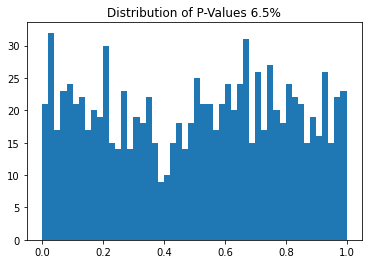

In [ ]:
# show p-values. 
plt.hist(p_vals, bins = 50);
reject_p_values = np.sum(p_vals < 0.05)/1000 * 100
plt.title(f"Distribution of P-Values {reject_p_values}%")

Text(0.5, 1.0, 'Distribution of Sample Skewness For a Gaussian')

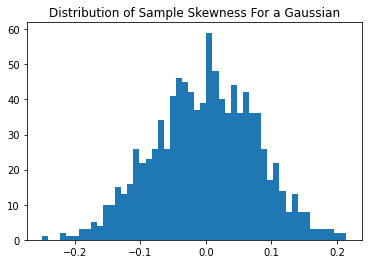

In [ ]:
# distribution of skews. 
plt.hist(skews, bins = 50);
plt.title(f"Distribution of Sample Skewness For a Gaussian")

Text(0.5, 1.0, 'Distribution of Sample Kurtosis For a Gaussian')

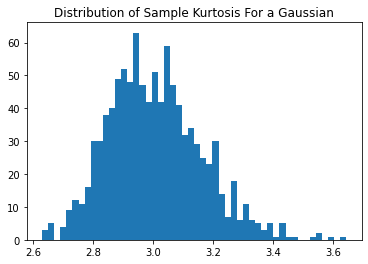

In [ ]:
# distribution of kurtosis, should be centered around 3.0 
plt.hist(etas, bins = 50);
plt.title(f"Distribution of Sample Kurtosis For a Gaussian")

## Real Dataset

EM vs. Stochastic EM benchmarks, which algorithm performs better? 

In [ ]:
df = pd.read_csv("results.csv")

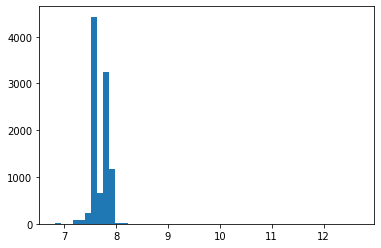

In [ ]:
plt.hist(np.log(df.EM.to_numpy()), bins = 50);

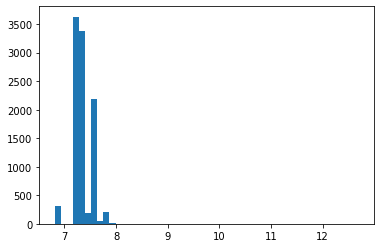

In [ ]:
plt.hist(np.log(df[" SEM"].to_numpy()), bins = 50);

In [ ]:
print(f"EM min: {np.min(df.EM.to_numpy())} ")
print(f"EM median: {np.median(df.EM.to_numpy())} ")
print(f"EM mean: {np.mean(df.EM.to_numpy())} ")
print(f"EM maximum: {np.max(df.EM.to_numpy())}")

EM min: 908.0 
EM median: 2304.0 
EM mean: 2316.4504 
EM maximum: 322180.0


In [ ]:
print(f"SEM min: {np.min(df[' SEM'].to_numpy())} ")
print(f"SEM median: {np.median(df[' SEM'].to_numpy())} ")
print(f"SEM mean: {np.mean(df[' SEM'].to_numpy())} ")
print(f"SEM maximum: {np.max(df[' SEM'].to_numpy())}")

SEM min: 907.0 
SEM median: 1466.0 
SEM mean: 1738.1288 
SEM maximum: 329304.0


## Results 

The EM and SEM both have similar performances for the tail/extremes, however they different in overall performance. 

For example, 

in the best case scenario the SEM (907 ns) vs EM (908 ns) shows essentially equal performance. 

In the worst case they are also similar in performance with an SEM taking slightly longer but overall comparable. 

However in the majority of cases we find that the SEM outperforms the EM according to the mean, and median, indicating that for the majority of our timings, the SEM outperforms the EM, in a head to head (93.89% of the time).

In [ ]:
# check proportions. 

In [ ]:
sem_vs_em_prop = np.sum(df[" SEM"] < df["EM"])/ df.shape[0] * 100
print(f"{sem_vs_em_prop}% of the time the SEM is faster. ")

93.89% of the time the SEM is faster. 
